In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [83]:
# Load the data
defense_data = pd.read_csv("Career_Stats_Defensive.csv")

In [84]:
defense_data

,Player Id,Name,Position,Year,Team,Games Played,Total Tackles,Solo Tackles,Assisted Tackles,Sacks,Safties,Passes Defended,Ints,Ints for TDs,Int Yards,Yards Per Int,Longest Int Return
0,quinnjohnson/79593,"Johnson, Quinn",NaN,2013,Tennessee Titans,4,0,--,--,--,--,--,--,--,--,0.0,--
1,quinnjohnson/79593,"Johnson, Quinn",NaN,2012,Tennessee Titans,16,1,1,0,0.0,--,0,--,--,--,0.0,--
2,quinnjohnson/79593,"Johnson, Quinn",NaN,2011,Tennessee Titans,4,0,--,--,--,--,--,--,--,--,0.0,--
3,quinnjohnson/79593,"Johnson, Quinn",NaN,2011,Denver Broncos,0,0,--,--,--,--,--,--,--,--,0.0,--
4,quinnjohnson/79593,"Johnson, Quinn",NaN,2010,Green Bay Packers,11,4,4,0,0.0,--,0,--,--,--,0.0,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23993,torreysmith/2495459,"Smith, Torrey",WR,2012,Baltimore Ravens,16,1,1,0,0.0,0,0,--,--,--,0.0,--
23994,torreysmith/2495459,"Smith, Torrey",WR,2011,Baltimore Ravens,16,2,2,0,0.0,0,0,--,--,--,0.0,--
23995,j.d.folsom/238485,"Folsom, J.D.",NaN,2009,Miami Dolphins,2,1,1,0,0.0,--,0,--,--,--,0.0,--
23996,jamiereader/2502599,"Reader, Jamie",NaN,2001,Philadelphia Eagles,16,7,7,0,0.0,--,0,--,--,--,0.0,--


In [85]:
# Convert non-numeric values in the relevant columns to NaN
defense_data['Total Tackles'] = pd.to_numeric(defense_data['Total Tackles'], errors='coerce')
defense_data['Sacks'] = pd.to_numeric(defense_data['Sacks'], errors='coerce')
defense_data['Ints'] = pd.to_numeric(defense_data['Ints'], errors='coerce')

In [86]:
# Group the data by year and calculate the average values for key performance indicators
average_tackles_by_year = defense_data.groupby('Year')['Total Tackles'].mean()
average_sacks_by_year = defense_data.groupby('Year')['Sacks'].mean()
average_ints_by_year = defense_data.groupby('Year')['Ints'].mean()

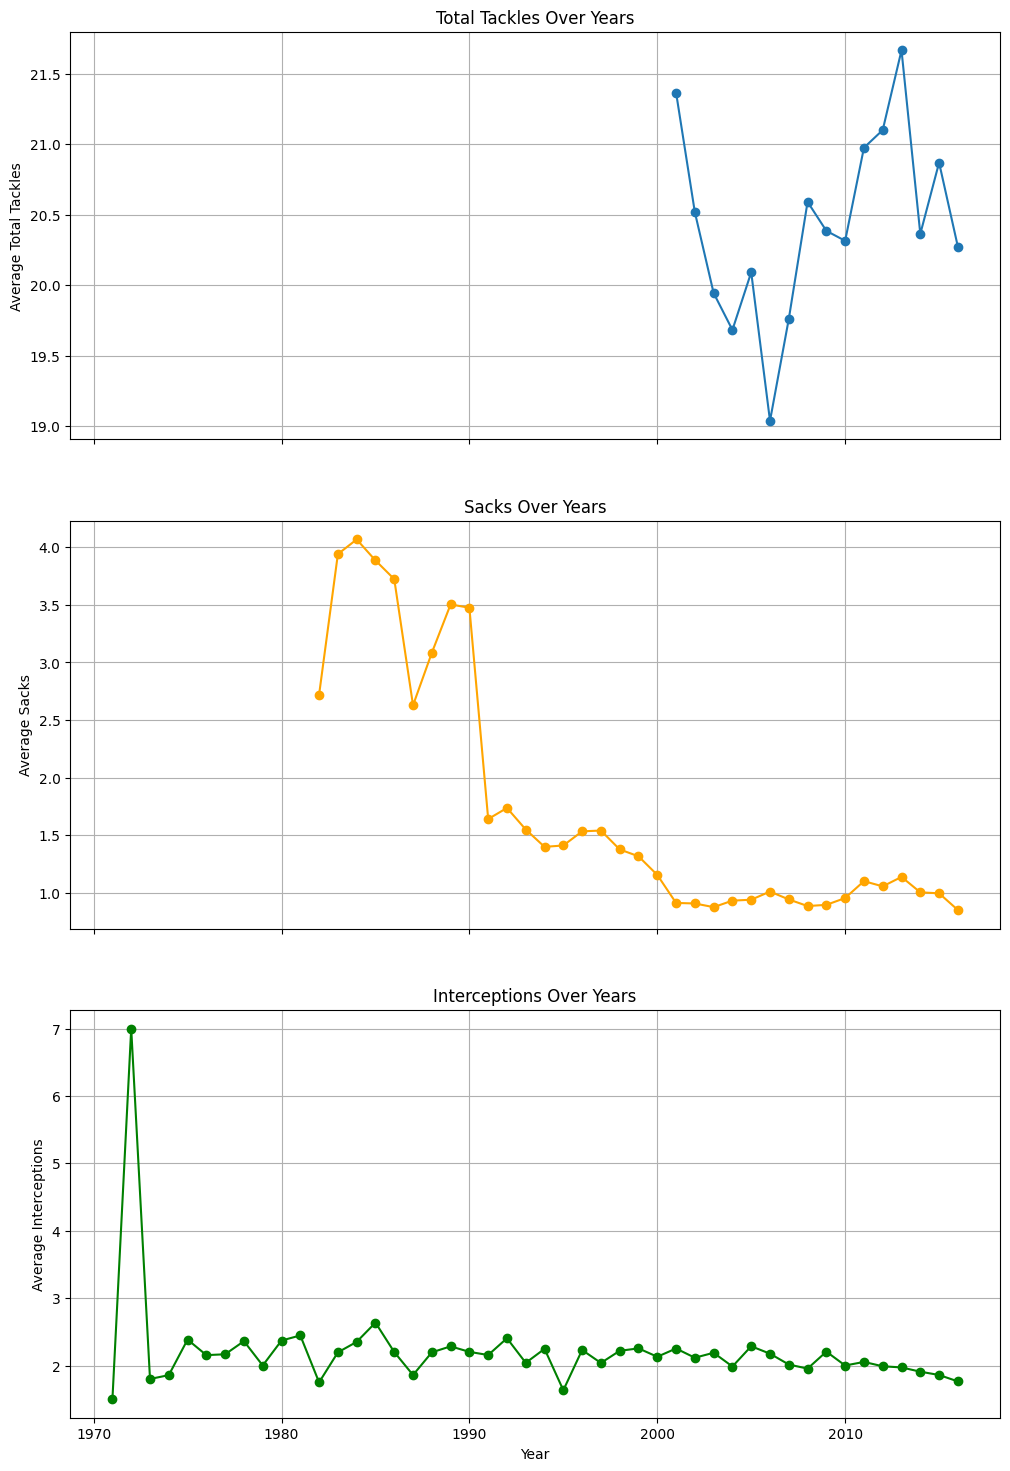

In [87]:
# Create line plots to visualize the trends
fig, ax = plt.subplots(3, 1, figsize=(12, 18), sharex=True)

ax[0].plot(average_tackles_by_year.index, average_tackles_by_year.values, marker='o')
ax[0].set_ylabel('Average Total Tackles')
ax[0].set_title('Total Tackles Over Years')
ax[0].grid()

ax[1].plot(average_sacks_by_year.index, average_sacks_by_year.values, marker='o', color='orange')
ax[1].set_ylabel('Average Sacks')
ax[1].set_title('Sacks Over Years')
ax[1].grid()

ax[2].plot(average_ints_by_year.index, average_ints_by_year.values, marker='o', color='green')
ax[2].set_xlabel('Year')
ax[2].set_ylabel('Average Interceptions')
ax[2].set_title('Interceptions Over Years')
ax[2].grid()

plt.show()

In [88]:
# Select relevant features
selected_features = ['Tackles', 'Assists', 'Sacks', 'Interceptions', 'Forced Fumbles']

In [89]:
print(defense_data.dtypes)

Player Id              object
Name                   object
Position               object
Year                    int64
Team                   object
Games Played            int64
Total Tackles         float64
Solo Tackles           object
Assisted Tackles       object
Sacks                 float64
Safties                object
Passes Defended        object
Ints                  float64
Ints for TDs           object
Int Yards              object
Yards Per Int         float64
Longest Int Return     object
dtype: object


In [90]:
print(defense_data.columns)

Index(['Player Id', 'Name', 'Position', 'Year', 'Team', 'Games Played',
       'Total Tackles', 'Solo Tackles', 'Assisted Tackles', 'Sacks', 'Safties',
       'Passes Defended', 'Ints', 'Ints for TDs', 'Int Yards', 'Yards Per Int',
       'Longest Int Return'],
      dtype='object')


In [100]:
defense_data.fillna(0, inplace=True)

In [104]:
selected_features = [6, 8, 9, 12, 4] # Update the indices according to the provided column list

In [106]:
# Create target variable
defense_data['Total_Defensive_Rating'] = defense_data.iloc[:, 6] + defense_data.iloc[:, 8] + defense_data.iloc[:, 9] * 2 + defense_data.iloc[:, 12] * 2 + defense_data.iloc[:, 11] * 2

In [103]:
features = defense_data.iloc[:, selected_features]

In [112]:
# Feature Engineering: Create a new feature called Efficiency
defense_data['Efficiency'] = defense_data['Total_Defensive_Rating'] / defense_data['games_played']

In [113]:
# Update the selected features to include the new feature (Efficiency column index is -1, as it is the last column)
selected_features.append(-1)

In [114]:
# Define the target variable and the feature set
target = 'Total_Defensive_Rating'
features = defense_data.iloc[:, selected_features]

In [115]:
# Drop any missing values
features = features.dropna()
defense_data = defense_data.dropna(subset=features.columns)

In [116]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, defense_data[target], test_size=0.2, random_state=42)

In [119]:
# Drop non-numeric columns
X_train_numeric = X_train.drop(['team'], axis=1)
X_test_numeric = X_test.drop(['team'], axis=1)

In [120]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

In [121]:
# Train and test the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lin_reg = lin_reg.predict(X_test_scaled)

In [122]:
# Train and test the Random Forest Regressor model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_scaled, y_train)
y_pred_rf_reg = rf_reg.predict(X_test_scaled)

In [123]:
# Calculate the evaluation metrics for both models
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
rmse_lin_reg = np.sqrt(mse_lin_reg)
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)

In [125]:
# Print the evaluation metrics
print("Linear Regression:")
print(f"Mean Squared Error: {mse_lin_reg:.2f}")
print(f"Root Mean Squared Error: {rmse_lin_reg:.2f}")
print(f"R2 Score: {r2_lin_reg:.2f}\n")

Linear Regression:
Mean Squared Error: 11.56
Root Mean Squared Error: 3.40
R2 Score: 0.99



In [127]:
mse_rf_reg = mean_squared_error(y_test, y_pred_rf_reg)
rmse_rf_reg = np.sqrt(mse_rf_reg)
r2_rf_reg = r2_score(y_test, y_pred_rf_reg)

In [128]:
print("Random Forest Regressor:")
print(f"Mean Squared Error: {mse_rf_reg:.2f}")
print(f"Root Mean Squared Error: {rmse_rf_reg:.2f}")
print(f"R2 Score: {r2_rf_reg:.2f}")

Random Forest Regressor:
Mean Squared Error: 6.37
Root Mean Squared Error: 2.52
R2 Score: 1.00
